In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 1.0
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_1.0_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_1.0_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2659979.8444

Best Fitness:	1323501.3465
Solution:	100.0000
Diff:		1323401.3465

[0:39:16][----------] 1.96% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4959819.6170

Best Fitness:	2469292.4276
Solution:	100.0000
Diff:		2469192.4276

[1:13:49][----------] 3.92% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	12315350.4060

Best Fitness:	7091620.8075
Solution:	100.0000
Diff:		7091520.8075

[1:48:20][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5771753.0350

Best Fitness:	2583993.3199
Solution:	100.0000
Diff:		2583893.3199

[2:21:45][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3775764.6165

Best Fitness:	1875327.5742
Solution:	100.0000
Diff:		1875227.5742

[2:51:43][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	6581462.9957

Best Fitness:	3084193.5898
Solution:	100.0000
Diff:		3084093.5898

[3:19:47][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3243842.2707

Best Fitness:	1520930.9048
Solution:	100.0000
Diff:		1520830.9048

[3:46:28][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2465134.7146

Best Fitness:	1084139.9716
Solution:	100.0000
Diff:		1084039.9716

[4:12:43][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3785686.5355

Best Fitness:	1678536.0626
Solution:	100.0000
Diff:		1678436.0626

[4:39:31][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	6154432.6149

Best Fitness:	2935537.6524
Solution:	100.0000
Diff:		2935437.6524

[5:03:52][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2874950.3412

Best Fitness:	1476792.9166
Solution:	100.0000
Diff:		1476692.9166

[5:25:08][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3237163.5105

Best Fitness:	1776092.8283
Solution:	100.0000
Diff:		1775992.8283

[5:44:34][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	7901227.0007

Best Fitness:	3624256.6826
Solution:	100.0000
Diff:		3624156.6826

[6:02:58][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5393519.3095

Best Fitness:	3178280.6102
Solution:	100.0000
Diff:		3178180.6102

[6:20:27][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	6919951.4891

Best Fitness:	3796631.7435
Solution:	100.0000
Diff:		3796531.7435

[6:36:31][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2364886.3269

Best Fitness:	965283.0626
Solution:	100.0000
Diff:		965183.0626

[6:50:30][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4150698.2133

Best Fitness:	2040704.4537
Solution:	100.0000
Diff:		2040604.4537

[7:02:58][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5746832.5035

Best Fitness:	2844145.4695
Solution:	100.0000
Diff:		2844045.4695

[7:15:18][####------] 35.29% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4160238.7818

Best Fitness:	1931324.5266
Solution:	100.0000
Diff:		1931224.5266

[7:27:39][####------] 37.25% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5190746.8203

Best Fitness:	2666912.7924
Solution:	100.0000
Diff:		2666812.7924

[7:39:56][####------] 39.22% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3800540.0207

Best Fitness:	1866391.7960
Solution:	100.0000
Diff:		1866291.7960

[7:51:04][####------] 41.18% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3129644.2613

Best Fitness:	1752637.0835
Solution:	100.0000
Diff:		1752537.0835

[8:01:48][####------] 43.14% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3913472.9317

Best Fitness:	1692712.5235
Solution:	100.0000
Diff:		1692612.5235

[8:12:31][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4122198.8850

Best Fitness:	1936444.8646
Solution:	100.0000
Diff:		1936344.8646

[8:23:14][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5427847.8267

Best Fitness:	3119022.5621
Solution:	100.0000
Diff:		3118922.5621

[8:33:57][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3375711.2442

Best Fitness:	1476428.7443
Solution:	100.0000
Diff:		1476328.7443

[8:43:50][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3731154.3029

Best Fitness:	1826798.8639
Solution:	100.0000
Diff:		1826698.8639

[8:53:27][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3701418.0647

Best Fitness:	2094338.7567
Solution:	100.0000
Diff:		2094238.7567

[9:03:00][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5795167.0610

Best Fitness:	3333014.8650
Solution:	100.0000
Diff:		3332914.8650

[9:12:37][######----] 56.86% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3933510.2727

Best Fitness:	2176519.5086
Solution:	100.0000
Diff:		2176419.5086

[9:22:13][######----] 58.82% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3196046.2551

Best Fitness:	1596535.9526
Solution:	100.0000
Diff:		1596435.9526

[9:32:28][######----] 60.78% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3392427.5084

Best Fitness:	1585359.9573
Solution:	100.0000
Diff:		1585259.9573

[9:41:59][######----] 62.75% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4270267.8888

Best Fitness:	2352310.6723
Solution:	100.0000
Diff:		2352210.6723

[9:51:19][######----] 64.71% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2911755.4313

Best Fitness:	1583800.3781
Solution:	100.0000
Diff:		1583700.3781

[10:00:50][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2950044.1860

Best Fitness:	1485949.8232
Solution:	100.0000
Diff:		1485849.8232

[10:10:13][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3231943.9331

Best Fitness:	1538950.3880
Solution:	100.0000
Diff:		1538850.3880

[10:19:21][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3265665.8389

Best Fitness:	1455607.3185
Solution:	100.0000
Diff:		1455507.3185

[10:27:48][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4818923.4244

Best Fitness:	2788784.7182
Solution:	100.0000
Diff:		2788684.7182

[10:36:14][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4308095.0977

Best Fitness:	2122423.2191
Solution:	100.0000
Diff:		2122323.2191

[10:44:34][########--] 76.47% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	6854077.0982

Best Fitness:	2976909.0005
Solution:	100.0000
Diff:		2976809.0005

[10:52:52][########--] 78.43% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2992748.5433

Best Fitness:	1473693.7359
Solution:	100.0000
Diff:		1473593.7359

[11:01:00][########--] 80.39% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4955345.2995

Best Fitness:	2594876.3243
Solution:	100.0000
Diff:		2594776.3243

[11:08:53][########--] 82.35% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4294500.9130

Best Fitness:	2150735.4659
Solution:	100.0000
Diff:		2150635.4659

[11:16:48][########--] 84.31% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	2339581.6056

Best Fitness:	1129772.0654
Solution:	100.0000
Diff:		1129672.0654

[11:24:37][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	3853731.9509

Best Fitness:	2096933.7424
Solution:	100.0000
Diff:		2096833.7424

[11:32:32][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5667970.4886

Best Fitness:	2002622.4522
Solution:	100.0000
Diff:		2002522.4522

[11:40:21][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4431424.4728

Best Fitness:	2317940.2785
Solution:	100.0000
Diff:		2317840.2785

[11:47:48][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	5613368.8385

Best Fitness:	3391017.7721
Solution:	100.0000
Diff:		3390917.7721

[11:55:13][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	6774936.9262

Best Fitness:	2633343.4833
Solution:	100.0000
Diff:		2633243.4833

[12:02:47][##########] 96.08% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4058935.1955

Best Fitness:	2022714.4833
Solution:	100.0000
Diff:		2022614.4833

[12:10:19][##########] 98.04% 

Optimization ended due to max fitness evals (max = 300000.0, curr = 299100)


#Generations:	995

#FitnessEvals:	299100

Mean Fitness:	4090557.5787

Best Fitness:	2323869.3592
Solution:	100.0000
Diff:		2323769.3592

[12:17:33][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

12:17:33

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
990,4.149033e+06,4.310975e+06,5.419903e+06,5.514592e+06,3.991607e+06,3.445067e+06,4.083359e+06,6.470713e+06,4.167648e+06,5.835822e+06,...,3.974451e+06,4.719595e+06,5.147265e+06,3.407198e+06,3.668744e+06,5.014299e+06,4.619442e+06,3.717817e+06,3.338654e+06,50
991,4.149033e+06,4.310975e+06,5.419903e+06,5.514592e+06,3.991607e+06,3.445067e+06,4.083359e+06,6.470713e+06,4.167648e+06,5.835822e+06,...,3.974451e+06,4.719595e+06,5.147265e+06,3.407198e+06,3.668744e+06,5.014299e+06,3.462293e+06,3.717817e+06,3.338654e+06,50
992,4.149033e+06,4.310975e+06,5.419903e+06,5.514592e+06,3.991607e+06,3.445067e+06,4.083359e+06,6.470713e+06,4.167648e+06,4.652373e+06,...,3.974451e+06,4.719595e+06,5.147265e+06,3.407198e+06,3.668744e+06,5.014299e+06,3.462293e+06,3.717817e+06,3.338654e+06,50
993,4.149033e+06,4.310975e+06,4.316912e+06,5.514592e+06,3.991607e+06,3.445067e+06,4.083359e+06,6.470713e+06,4.167648e+06,4.652373e+06,...,3.974451e+06,4.719595e+06,5.147265e+06,3.407198e+06,3.668744e+06,5.014299e+06,3.462293e+06,3.717817e+06,3.338654e+06,50
994,4.149033e+06,4.310975e+06,4.316912e+06,5.514592e+06,3.991607e+06,3.445067e+06,4.083359e+06,6.470713e+06,4.167648e+06,4.652373e+06,...,3.974451e+06,4.719595e+06,5.147265e+06,3.407198e+06,3.668744e+06,5.014299e+06,3.462293e+06,3.717817e+06,3.338654e+06,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1323401.3464780904

Best error for run 1: 2469192.427645129

Best error for run 2: 7091520.807458149

Best error for run 3: 2583893.3199290177

Best error for run 4: 1875227.5742336295

Best error for run 5: 3084093.589830914

Best error for run 6: 1520830.904817041

Best error for run 7: 1084039.9716388828

Best error for run 8: 1678436.06261934

Best error for run 9: 2935437.652392935

Best error for run 10: 1476692.9165984867

Best error for run 11: 1775992.8282803786

Best error for run 12: 3624156.6826343522

Best error for run 13: 3178180.610207552

Best error for run 14: 3796531.743487747

Best error for run 15: 965183.0626475948

Best error for run 16: 2040604.4536980228

Best error for run 17: 2844045.469529471

Best error for run 18: 1931224.526629576

Best error for run 19: 2666812.792354394

Best error for run 20: 1866291.795961547

Best error for run 21: 1752537.0834806988

Best error for run 22: 1692612.5234535607

Best error for run 23: 1936344.8645623447

Best error for run 24: 3118922.5620756024

Best error for run 25: 1476328.7442640194

Best error for run 26: 1826698.8639077146

Best error for run 27: 2094238.7566588453

Best error for run 28: 3332914.8650393942

Best error for run 29: 2176419.508598672

Best error for run 30: 1596435.9526460317

Best error for run 31: 1585259.9573495358

Best error for run 32: 2352210.6723425663

Best error for run 33: 1583700.3780954804

Best error for run 34: 1485849.8231765176

Best error for run 35: 1538850.3880361568

Best error for run 36: 1455507.3185494363

Best error for run 37: 2788684.718207538

Best error for run 38: 2122323.219122266

Best error for run 39: 2976809.0005002567

Best error for run 40: 1473593.7359167358

Best error for run 41: 2594776.3243432734

Best error for run 42: 2150635.465948153

Best error for run 43: 1129672.0653618618

Best error for run 44: 2096833.742374058

Best error for run 45: 2002522.4522186827

Best error for run 46: 2317840.2784913047

Best error for run 47: 3390917.7721123444

Best error for run 48: 2633243.4832537393

Best error for run 49: 2022614.4833057374

Best error for run 50: 2323769.3592265565

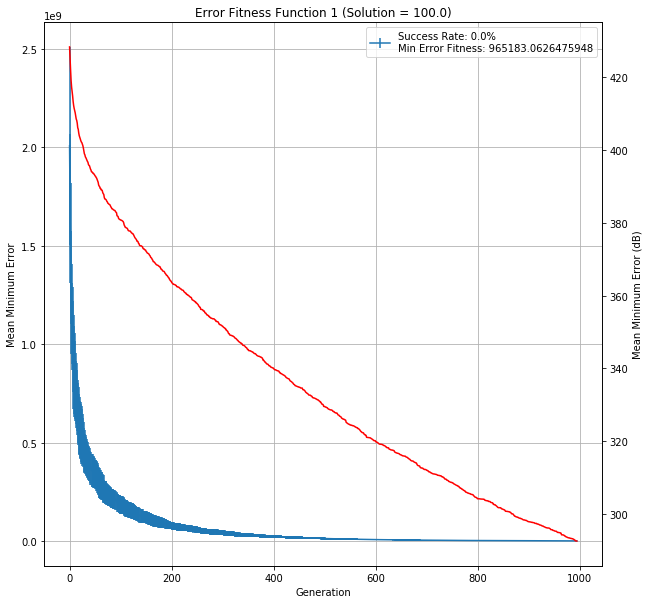

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_1.0_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,1.0,1.323401e+06,2.469192e+06,7.091521e+06,2.583893e+06,1.875228e+06,3.084094e+06,...,2.096834e+06,2.002522e+06,2.317840e+06,3.390918e+06,2.633243e+06,2.022614e+06,2.323769e+06,2.251782e+06,12:17:33,299100
